# Importing Visualisation Dataset

In [1]:
# Import the libraries.
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import scale, robust_scale

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

visualisationdf = pd.read_csv('Visualisation.csv')
print(visualisationdf.shape)

(111856, 15)


In [2]:
print(visualisationdf.columns)

Index(['Year', 'Month', 'Date', 'Country', 'Region', 'Province', 'City',
       'Attack', 'Target', 'Nationality', 'Group', 'Individual', 'Weapon',
       'Ishostkid', 'Transformed_Attack'],
      dtype='object')


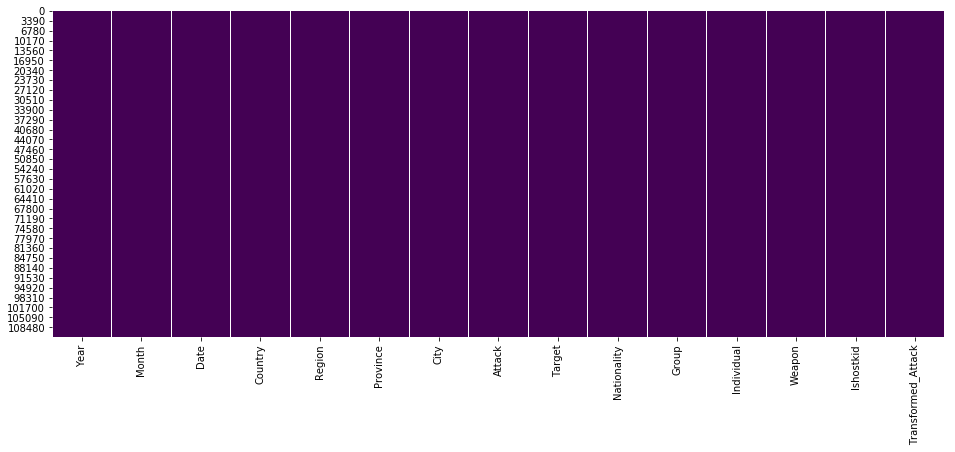

In [3]:
plt.figure(figsize=(16,6))
sns.heatmap(visualisationdf.isnull(),cmap='viridis',cbar=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

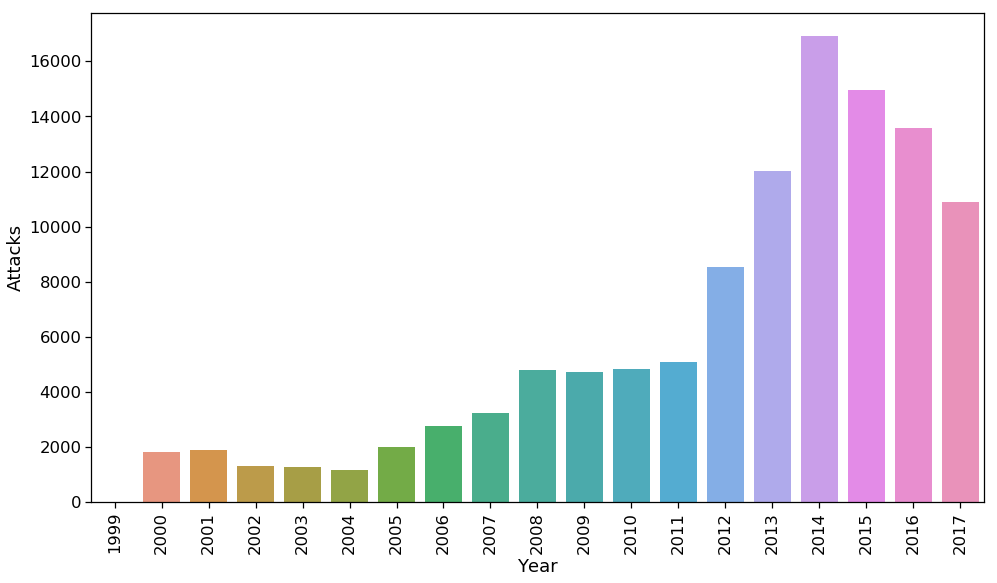

In [4]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
v1=visualisationdf['Year'].value_counts().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'}).sort_values(by='Year')
sns.barplot(data=v1,x='Year',y='Attacks',ci=None)
plt.xticks(rotation=90)

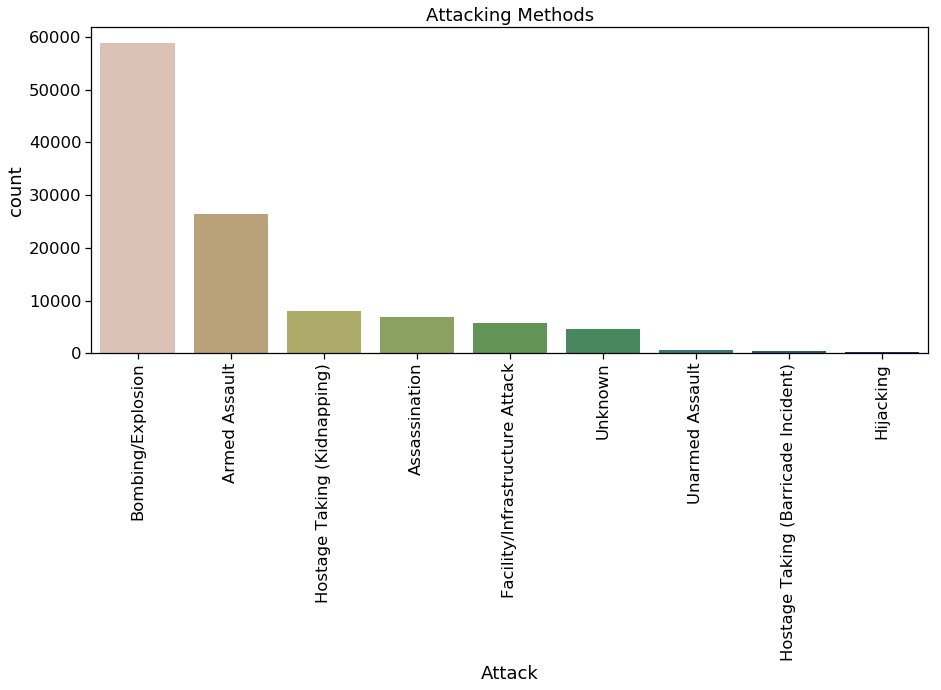

In [5]:
#Attacking Methods
plt.subplots(figsize=(15,6))
sns.countplot('Attack',data=visualisationdf,palette='gist_earth_r',order=visualisationdf['Attack'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods')
plt.show()

In [6]:
!pip install wordcloud

     |████████████████████████████████| 368kB 3.3MB/s eta 0:00:01█████████████████▉           | 235kB 3.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


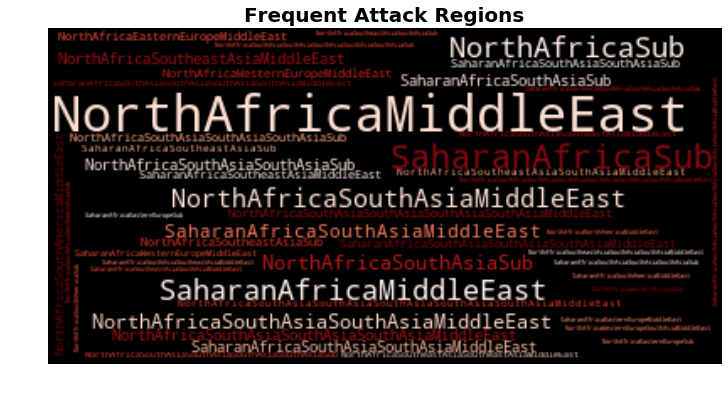

In [7]:
from wordcloud import WordCloud, ImageColorGenerator


plt.figure(figsize=(10,20))
wordcloud = WordCloud(background_color= 'black', 
                      max_font_size=500, 
                      collocations= False, 
                      relative_scaling= 0.4, 
                      colormap= "Reds").generate(''.join([x for x in visualisationdf['Region'].str.replace(' ','')]))
plt.title('Frequent Attack Regions', fontdict = {'size':20, 'weight':'bold'})
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

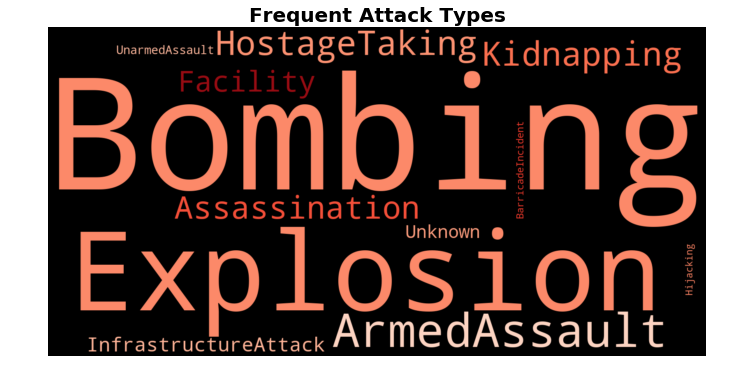

In [8]:
plt.figure(figsize=(10,20), 
#            facecolor='k'
          )
wordcloud = WordCloud(background_color= 'black',width=1600, height=800, max_font_size=500, collocations= False, relative_scaling= 0.4, 
                      colormap= "Reds").generate(' '.join([x for x in visualisationdf['Attack'].str.replace(' ','')]))
plt.title('Frequent Attack Types', fontdict = {'size':20, 'weight':'bold'})
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

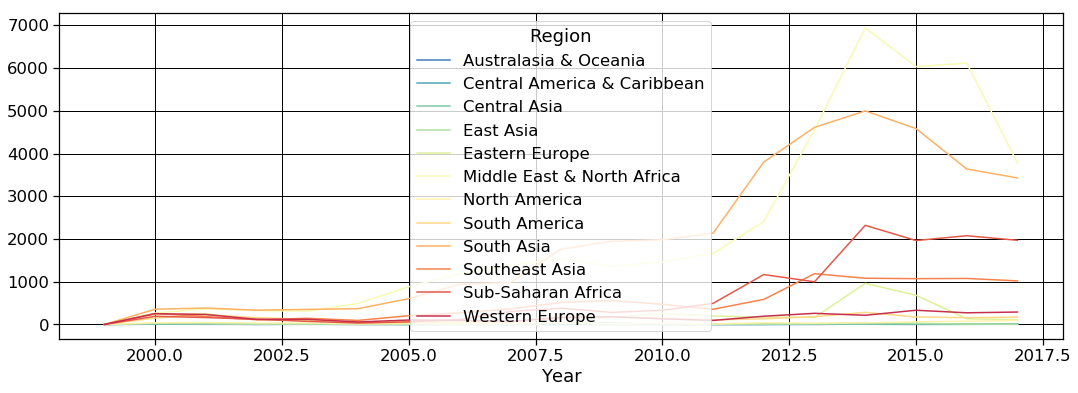

In [9]:
ax = pd.crosstab(visualisationdf['Year'], visualisationdf['Region']).plot(color = sns.color_palette('Spectral_r',12))
fig = plt.gcf()
fig.set_size_inches(18,6)
ax.grid(True, color = 'black')
plt.show()

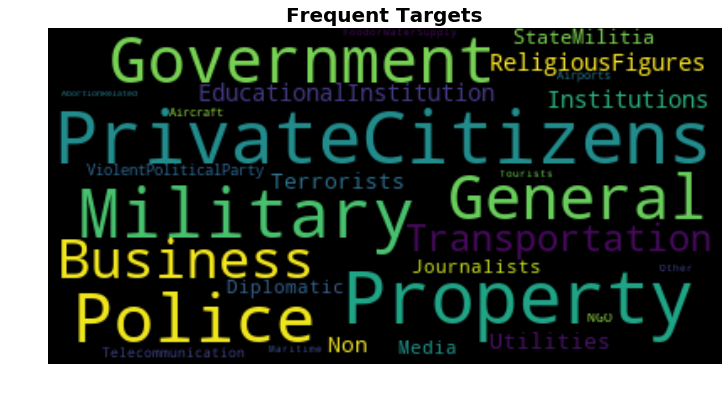

In [10]:
plt.figure(figsize=(10,20),
#            facecolor='k'
          )
wordcloud = WordCloud(background_color= 'black', 
                      max_font_size=500, 
                      collocations= False, 
                      relative_scaling= 0.2,
                      stopwords = ['Unknown','Member','Bu']).generate(' '.join([str(x).replace(' ','') for x in visualisationdf['Target']]))
plt.title('Frequent Targets', fontdict = {'size':20, 'weight':'bold'})
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad= 0)
plt.axis('off')
plt.show()

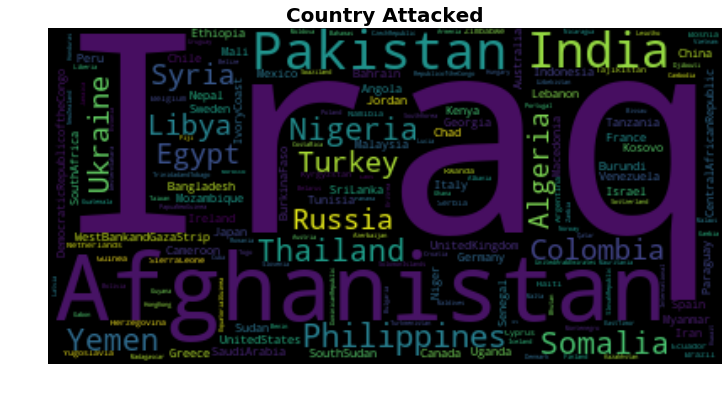

In [11]:
plt.figure(figsize=(10,20),
#            facecolor='k'
          )
wordcloud = WordCloud(background_color= 'black', 
                      max_font_size=500, 
                      collocations= False, 
                      relative_scaling= 0.2,
                      stopwords = ['Unknown','Member','Bu']).generate(' '.join([str(x).replace(' ','') for x in visualisationdf['Country']]))
plt.title('Country Attacked', fontdict = {'size':20, 'weight':'bold'})
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad= 0)
plt.axis('off')
plt.show()

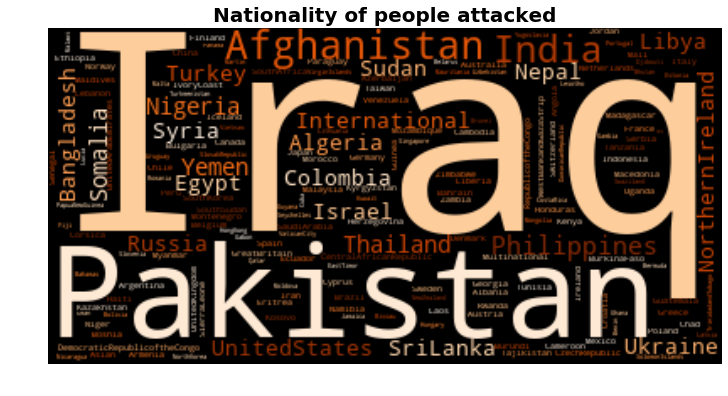

In [12]:
plt.figure(figsize=(10,20),
#            facecolor='k'
          )
wordcloud = WordCloud(background_color= 'black', 
                      max_font_size=500, 
                      collocations= False, 
                      relative_scaling= 0.2, 
                      colormap = 'Oranges', 
                      stopwords = ['Unknown','Member','Bu']).generate(' '.join([str(x).replace(' ','') for x in visualisationdf['Nationality']]))
plt.title('Nationality of people attacked', fontdict = {'size':20, 'weight':'bold'})
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad= 0)
plt.axis('off')
plt.show()

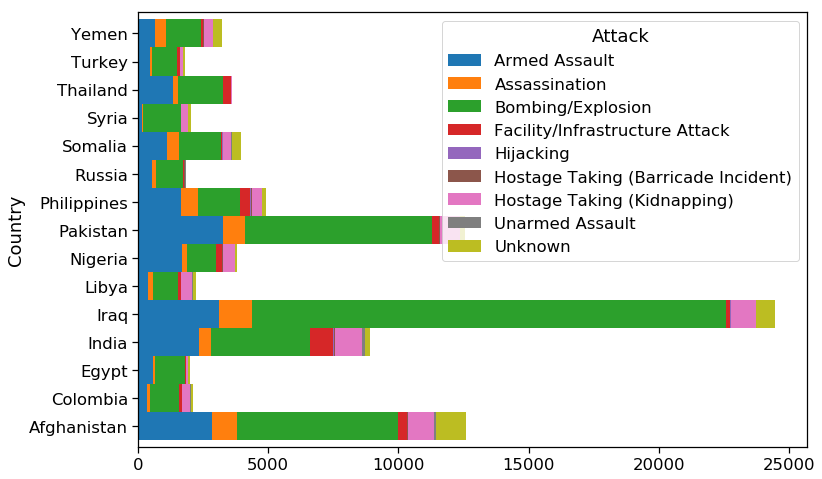

In [24]:
#Country vs Attack
topcountrieslist = ['Iraq','Afghanistan', 'Pakistan', 'India', 'Philippines', 'Somalia', 'Nigeria', 'Thailand', 'Yemen', 'Libya', 'Colombia', 'Syria', 'Egypt', 'Russia', 'Turkey']
topcountriesdf = visualisationdf
topcountriesdf = topcountriesdf[topcountriesdf['Country'].isin(topcountrieslist)]
pd.crosstab(topcountriesdf.Country,topcountriesdf.Attack).plot.barh(stacked=True,width=1)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

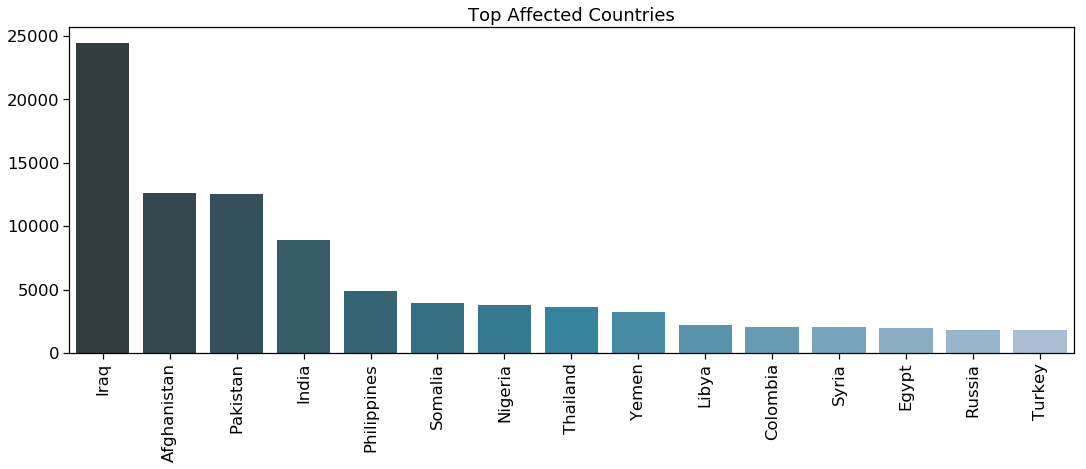

In [18]:
#Top Affected Countries
plt.subplots(figsize=(18,6))
sns.barplot(visualisationdf['Country'].value_counts()[:15].index,visualisationdf['Country'].value_counts()[:15].values,palette='PuBuGn_d')
plt.title('Top Affected Countries')
plt.xticks(rotation=90)
plt.show()

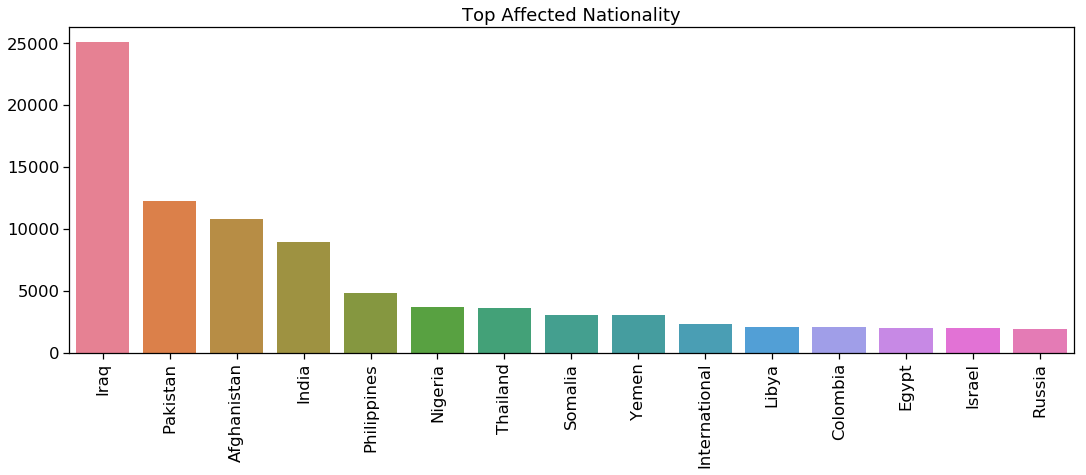

In [19]:
#Top Affected Countries
plt.subplots(figsize=(18,6))
sns.barplot(visualisationdf['Nationality'].value_counts()[:15].index,visualisationdf['Nationality'].value_counts()[:15].values,palette='husl')
plt.title('Top Affected Nationality')
plt.xticks(rotation=90)
plt.show()

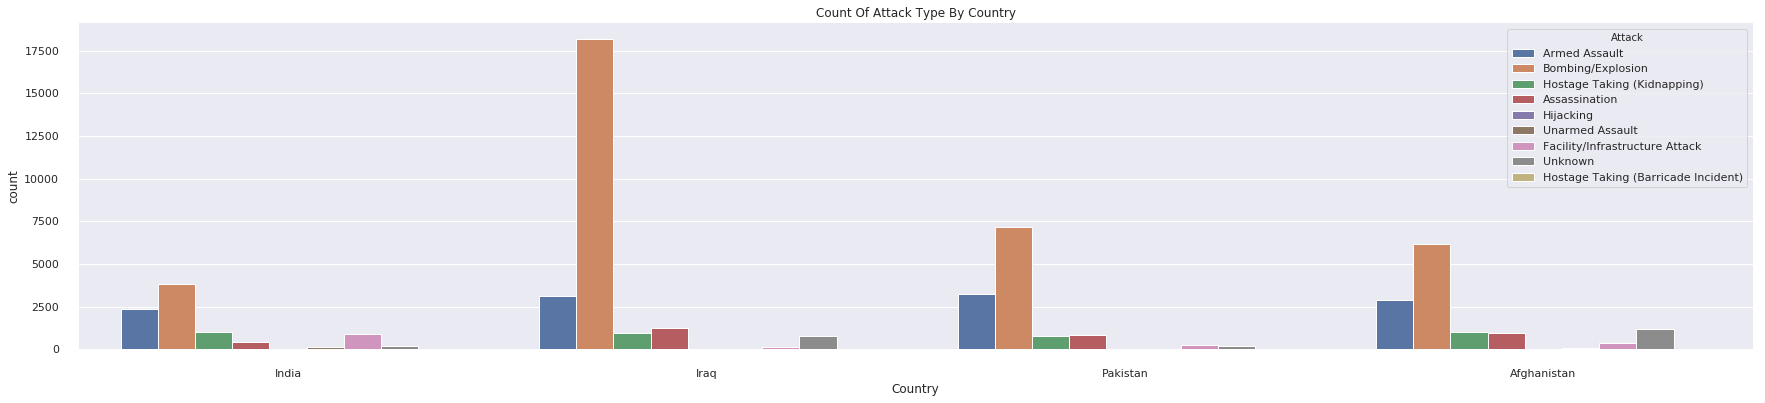

In [26]:
# set the background colour of the plot to white
topcountrieslist1 = ['Iraq','Afghanistan', 'Pakistan', 'India']
topcountriesdf1 = visualisationdf
topcountriesdf1 = topcountriesdf[topcountriesdf['Country'].isin(topcountrieslist1)]
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(30,6)})
# create a countplot
sns.countplot('Country',data=topcountriesdf1,hue = 'Attack')
# Remove the top and down margin
sns.despine(offset=10, trim=True)
# display the plot
plt.title('Count Of Attack Type By Country')
plt.show()

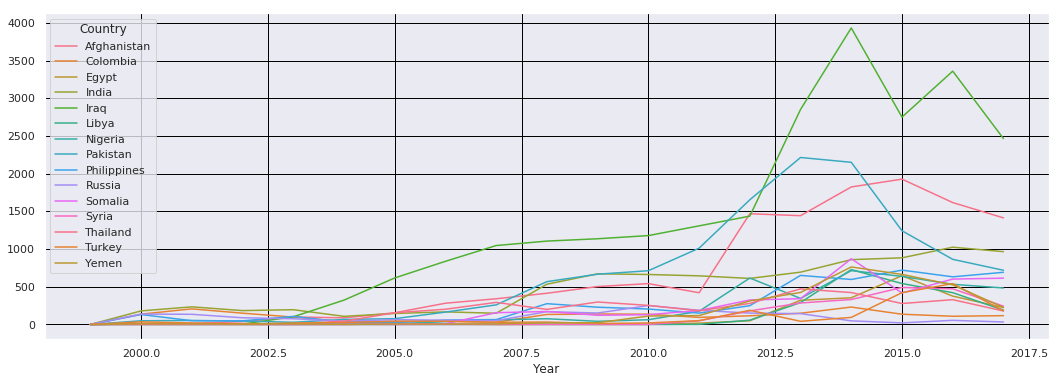

In [28]:
ax = pd.crosstab(topcountriesdf['Year'], topcountriesdf['Country']).plot(color = sns.color_palette('husl',12))
fig = plt.gcf()
fig.set_size_inches(18,6)
ax.grid(True, color = 'black')
plt.show()